In [137]:
import pandas as pd
import math
import warnings

warnings.simplefilter('ignore')

df = pd.read_csv('/Users/sayakghosh/Documents/sem1/dsf/hw2/all/train.csv',nrows=3000000)
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


The following gives the count of the number of rows that has been loaded to the dataframe

In [138]:
df.count()

key                  3000000
fare_amount          3000000
pickup_datetime      3000000
pickup_longitude     3000000
pickup_latitude      3000000
dropoff_longitude    2999977
dropoff_latitude     2999977
passenger_count      3000000
dtype: int64

Now we apply the following filters to clean the data. Filters applied are listed below
* Drop rows containing incomplete data i.e nan
* Bounding box on latitude and longitude to consider only the trips made in NYC
* Fare should be positive and less than 500 usd
* Passengar count should be positive and less than 8

In [139]:
filtered_df = df.dropna()
def valid_latitude(latitude):
    return (latitude >= 40.568973) & (latitude <= 41.709555)


def valid_longitude(longitude):
    return (longitude >= -74.263242) & (longitude <= -72.986532)


def valid_fare(fare):
    return (fare > 0) & fare < 500


def valid_passengar_count(passengar_count):
    return (passengar_count > 0) & passengar_count < 8


def data_in_range(row):
    return valid_fare(row['fare_amount']) & valid_latitude(row['pickup_latitude']) & valid_latitude(
        row['dropoff_latitude']) & valid_longitude(row['pickup_longitude']) & valid_longitude(
        row['dropoff_longitude']) & valid_passengar_count(row['passenger_count'])

Following shows the shape of the dataframe post data cleaning

In [140]:
filtered_df.where(data_in_range, inplace=True)
filtered_df.shape

(2999977, 8)

The euclidean distance of a trip is being computed in the following step

In [141]:
import matplotlib.pyplot as plt

def find_distance(row):
    return math.sqrt(pow(row['dropoff_latitude'] - row['pickup_latitude'], 2) + pow(
        row['dropoff_longitude'] - row['pickup_longitude'], 2))


filtered_df['distance'] = filtered_df.apply(find_distance, axis=1)

Following shows the scatter plot of *fare_amount* against *distance*

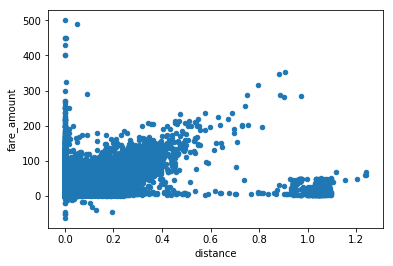

In [142]:
plt.show()
filtered_df.plot.scatter('distance','fare_amount')

The scatter plot shows that there is a strong positive correlation between *fare_amount* and *distance*. The same has been confirmed through the *pearson correlation* of the variables as shown below.

In [143]:
filtered_df['fare_amount'].corr(filtered_df['distance'], method='pearson')

0.8289114980484544

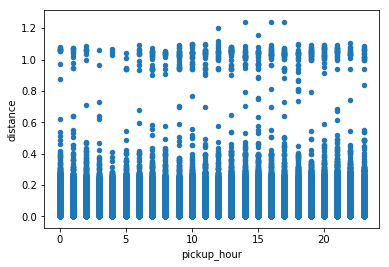

In [144]:
filtered_df['pickup_hour'] = filtered_df['pickup_datetime'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y-%m-%d %H:%M:%S %Z').hour)
filtered_df.plot.scatter(x='pickup_hour', y='distance')

The scatter flow clearly indicates that there is no correlation between the variables *distance* and *pickup_hour*. This has been confirmed through a negative correlation of a small magnitude as shown below.

In [145]:
filtered_df['pickup_hour'].corr(filtered_df['distance'], method='pearson')

-0.028676620563944728

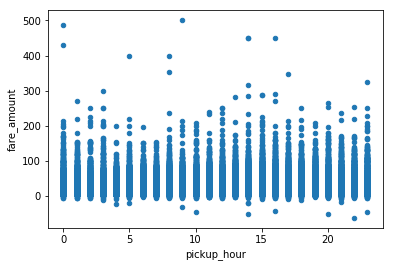

In [146]:
filtered_df.plot.scatter(x='pickup_hour', y='fare_amount')

The scatter flow clearly indicates that there is no correlation between the variables *fare_amount* and *pickup_hour*. This has been confirmed through a negative correlation of a small magnitude as shown below.

In [147]:
filtered_df['pickup_hour'].corr(filtered_df['fare_amount'], method='pearson')

-0.01741877553109307

In [148]:

filtered_df['pickup_time'] = filtered_df['pickup_datetime'].apply(
        lambda x: pd.to_datetime(str(x), format='%Y-%m-%d %H:%M:%S %Z'))
filtered_df['pickup_hour'] = filtered_df['pickup_time'].dt.hour
filtered_df['pickup_month'] = filtered_df['pickup_time'].dt.month
filtered_df['pickup_year'] = filtered_df['pickup_time'].dt.year
filtered_df['pickup_day'] = filtered_df['pickup_time'].dt.day
filtered_df['pickup_weekday'] = filtered_df['pickup_time'].dt.weekday

The following graph plots the total sales of taxi rides against every month. Whats interesting is that sales starts dropping sharply around June before starting to pickup around August. This interval coincides with summer. This might suggest that people enjoy their vacation around this time. Thus NYC is less busy in this interval as confirmed by the drop in taxi ride sales.

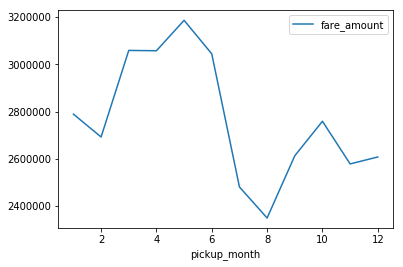

In [149]:
filtered_df.groupby('pickup_month')['fare_amount'].sum().plot(legend=True)

The following graph shows the busiest hours in a day. Traffic starts picking up from around 8am reaching its peak at around 6pm and again starting to dip at around 10pm i.e. the time when people start leaving for home for the day.

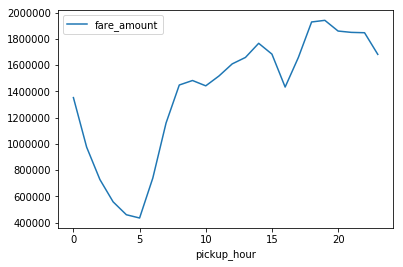

In [150]:
filtered_df.groupby('pickup_hour')['fare_amount'].sum().plot(legend=True)

The following graph shows the busiest days in a week. We can see that its busiest on Friday. This might be because its the last day of the week and people travel to NYC to party.

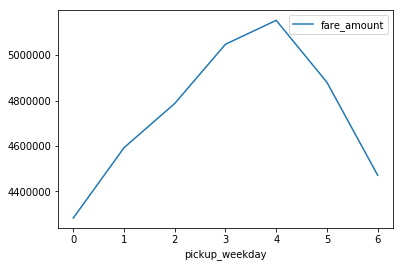

In [151]:
filtered_df.groupby('pickup_weekday')['fare_amount'].sum().plot(legend=True)

The following graph shows that taxi sales steadily increased from 2010 to 2013. This might be because of increase in fuel price in the same interval. Taxi sales drops drastically in 2015. But this might be because we do not have the entire dataset for 2015.

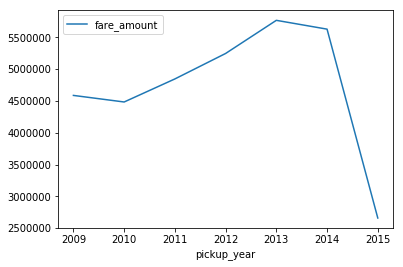

In [152]:
filtered_df.groupby('pickup_year')['fare_amount'].sum().plot(legend=True)

Holidays in NYC might be less busy as people might prefer to stay at home or travel elsewhere. This might lead to a decrease in demand and hence lower average *fare_amount*. In order to confirm the hypothesis an *external dataset*,the *US Federal Holiday calendar* has been loaded to the data frame and then each day is being flagged as whether its a holiday or not. 

is_holiday
0    11.314249
1    11.562500
Name: fare_amount, dtype: float64

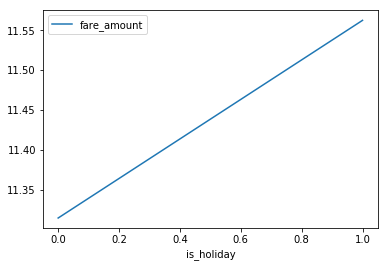

In [153]:
from pandas.tseries.holiday import USFederalHolidayCalendar
 
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2009-01-01', end='2015-12-31').to_pydatetime()
filtered_df['is_holiday'] = filtered_df['pickup_time'].apply(lambda x: 1 if x in holidays else 0)

filtered_df.groupby('is_holiday')['fare_amount'].mean().plot(legend=True)
filtered_df.groupby('is_holiday')['fare_amount'].mean()


The above plot shows that the mean *fare_amount* in a holiday is less than that a normal day thus confirming the hypothesis.

Now based on the graphs shown above, lets derive some additional features and some more. They are the following.
* pickup_hour - the hour of the day when the pickup was made
* pickup_month - the month of the trip
* pickup_year - the year of the trip
* pickup_day - the day of month of the trip
* pickup_weekday - the day of the week of the trip
* is_holiday - wheter the trip day is a holiday
* is_long_distance - whether its a long trip, a long trip might have surcharges in the form of toll tax
* to_airport_trip - whether the trip ends at an airport,airport trips usually have flat prices
* from_airport_trip - whether the trip starts from an airport
* pickup_cluster\[0-6\] - clustering the pickup points into multiple zones to identify hotspots such as Manhattan. Hotspots might be associated with more fare prices because of increased demand.
* dropoff_cluster\[0-6\] - clustering the dropoff points into multiple zones

In [154]:
import numpy as np
from sklearn.cluster import KMeans

def calculate_haversine_distance(dlat, dlong, plat, plong):
    p = 0.017453292519943295
    a = 0.5 - np.cos((dlat - plat) * p) / 2 + np.cos(plat * p) * \
        np.cos(dlat * p) * (1 - np.cos((dlong - plong) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

def is_close_to_airport(lat, long):
    jfk = (-73.7822222222, 40.6441666667)
    ewr = (-74.175, 40.69)
    lgr = (-73.87, 40.77)
    airport_locs = [jfk, ewr, lgr]

    for loc in airport_locs:
        if calculate_haversine_distance(lat, long, loc[1], loc[0]) <= 1.5:
            return True
    return False

def derive_features(filtered_df):
    filtered_df.dropna(inplace=True)
    filtered_df['distance'] = filtered_df.apply(lambda x: calculate_haversine_distance(x.dropoff_latitude, x.dropoff_longitude, x.pickup_latitude, x.pickup_longitude),
        axis=1)    
    filtered_df['pickup_time'] = filtered_df['pickup_datetime'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d %H:%M:%S %Z'))
    filtered_df['pickup_hour'] = filtered_df['pickup_time'].dt.hour
    filtered_df['pickup_month'] = filtered_df['pickup_time'].dt.month
    filtered_df['pickup_year'] = filtered_df['pickup_time'].dt.year
    filtered_df['pickup_day'] = filtered_df['pickup_time'].dt.day
    filtered_df['pickup_weekday'] = filtered_df['pickup_time'].dt.weekday

    cal = USFederalHolidayCalendar()
    holidays = cal.holidays(start='2009-01-01', end='2015-12-31').to_pydatetime()
    filtered_df['is_holiday'] = filtered_df['pickup_time'].apply(lambda x: 1 if x in holidays else 0)
    filtered_df['is_long_distance'] = filtered_df['distance'].apply(lambda x: x > 13)

    filtered_df['to_airport_trip'] = filtered_df.apply(
        lambda x: is_close_to_airport(x['dropoff_latitude'], x['dropoff_longitude']),
        axis=1)
    filtered_df['from_airport_trip'] = filtered_df.apply(
        lambda x: is_close_to_airport(x['pickup_latitude'], x['pickup_longitude']),
        axis=1)

    pickup_locs = filtered_df[['pickup_longitude', 'pickup_latitude']]
    model = KMeans(n_clusters=6)
    model.fit(pickup_locs)
    pickup_labels = model.predict(pickup_locs)
    filtered_df['pickup_cluster'] = pickup_labels

    dropoff_locs = filtered_df[['dropoff_longitude', 'dropoff_latitude']]
    model = KMeans(n_clusters=6)
    model.fit(dropoff_locs)
    dropoff_labels = model.predict(dropoff_locs)
    filtered_df['dropoff_cluster'] = dropoff_labels

    pickup_clusters = pd.get_dummies(filtered_df['pickup_cluster'], prefix='pickup_cluster', drop_first=False)
    dropff_clusters = pd.get_dummies(filtered_df['dropoff_cluster'], prefix='dropoff_cluster', drop_first=False)

    new_features_df = pd.concat([filtered_df, pickup_clusters], axis=1).drop('pickup_cluster', axis=1)
    new_features_df = pd.concat([new_features_df, dropff_clusters], axis=1).drop('dropoff_cluster', axis=1)

    return new_features_df


filtered_df = derive_features(filtered_df)

feature_columns = ['distance', 'pickup_year', 'pickup_day', 'pickup_month', 'pickup_hour', 'pickup_weekday',
                   'is_holiday', 'pickup_cluster_0', 'pickup_cluster_1', 'pickup_cluster_2', 'pickup_cluster_3',
                   'pickup_cluster_4', 'pickup_cluster_5', 'dropoff_cluster_0', 'dropoff_cluster_1',
                   'dropoff_cluster_2', 'dropoff_cluster_3', 'dropoff_cluster_4', 'dropoff_cluster_5',
                   'to_airport_trip', 'from_airport_trip', 'is_long_distance'
                   ]
filtered_df[feature_columns].describe()

,distance,pickup_year,pickup_day,pickup_month,pickup_hour,pickup_weekday,is_holiday,pickup_cluster_0,pickup_cluster_1,pickup_cluster_2,pickup_cluster_3,pickup_cluster_4,pickup_cluster_5,dropoff_cluster_0,dropoff_cluster_1,dropoff_cluster_2,dropoff_cluster_3,dropoff_cluster_4,dropoff_cluster_5
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,2.065500e+00,2.011737e+03,1.571061e+01,6.268985e+00,1.351218e+01,3.040890e+00,8.174807e-06,2.953640e-01,4.336422e-01,1.635200e-02,3.648008e-04,2.273956e-01,2.688149e-02,2.364628e-01,4.882199e-01,1.197303e-02,2.922494e-04,3.408895e-02,2.289631e-01
std,2.335226e+00,1.863382e+00,8.685204e+00,3.436098e+00,6.512832e+00,1.949691e+00,2.859151e-03,4.562063e-01,4.955772e-01,1.268251e-01,1.909628e-02,4.191502e-01,1.617371e-01,4.249096e-01,4.998613e-01,1.087643e-01,1.709281e-02,1.814577e-01,4.201655e-01
min,0.000000e+00,2.009000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.789050e-01,2.010000e+03,8.000000e+00,3.000000e+00,9.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.336923e+00,2.012000e+03,1.600000e+01,6.000000e+00,1.400000e+01,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.428244e+00,2.013000e+03,2.300000e+01,9.000000e+00,1.900000e+01,5.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,7.150330e+01,2.015000e+03,3.100000e+01,1.200000e+01,2.300000e+01,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


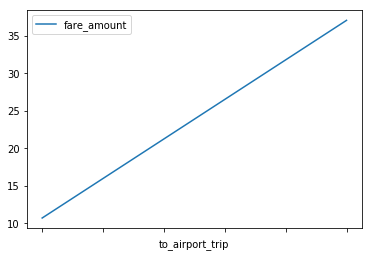

In [155]:
filtered_df.groupby('to_airport_trip')['fare_amount'].mean().plot(legend=True)

In the above and following graph we see that the average *fare_amount* of airport trips is much more than non airport trips

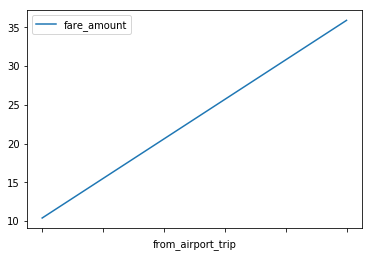

In [156]:
filtered_df.groupby('from_airport_trip')['fare_amount'].mean().plot(legend=True)

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def model_linear_regression(filtered_df, feature_columns, normalize):
    X = filtered_df[feature_columns]
    y = filtered_df['fare_amount']
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    linreg = LinearRegression(normalize)
    linreg.fit(X_train, y_train)
    print("Coeff:", linreg.coef_)
    return linreg, X_test, y_test

In [158]:
def test_linear_regression_model(linreg, X_test, y_test):
    y_pred = linreg.predict(X_test)
    print("Rmse:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Now lets model a naive linear regression model with only one feature *distance*.

In [159]:
from sklearn import metrics

feature_columns = ['distance']

linreg, X_test, y_test = model_linear_regression(filtered_df,feature_columns,normalize=False)
test_linear_regression_model(linreg,X_test, y_test)

Coeff: [4.29591204]
Rmse: 6.384415488178086


The rmse of the model comes out to as shown above.

Now lets model the linear regression with the features described above.

In [160]:
feature_columns = ['distance', 'pickup_year', 'pickup_day', 'pickup_month', 'pickup_hour', 'pickup_weekday',
                   'is_holiday', 'pickup_cluster_0', 'pickup_cluster_1', 'pickup_cluster_2', 'pickup_cluster_3',
                   'pickup_cluster_4', 'pickup_cluster_5', 'dropoff_cluster_0', 'dropoff_cluster_1',
                   'dropoff_cluster_2', 'dropoff_cluster_3', 'dropoff_cluster_4', 'dropoff_cluster_5',
                   'to_airport_trip', 'from_airport_trip', 'is_long_distance'
                   ]
linreg, X_test, y_test = model_linear_regression(filtered_df,feature_columns,normalize=False)
test_linear_regression_model(linreg,X_test, y_test)

Coeff: [ 3.03142972e+00  5.20936346e-01  9.72170301e-04  6.99448145e-02
  6.78223176e-03 -2.96108570e-02 -1.11642421e+00 -5.07026638e+02
 -5.06818008e+02 -5.03066426e+02 -6.09722053e+02 -5.06807926e+02
 -5.03766814e+02 -5.37596743e+02 -5.36896611e+02 -5.36748736e+02
 -4.51900531e+02 -5.37648076e+02 -5.36417168e+02  9.30383081e+00
  3.83505938e+00 -2.84016995e+00]
Rmse: 4.961469894245082


As we can see the rmse of this model is an improvement over the naive linear regression model. From the coeffecients printed above the most important features are as listed below
* distance
* is_long_distance
* to_airport_trip
* from_airport_trip
* is_holiday

Now lets normalize the features and run the linear regression model again.

In [161]:
linreg, X_test, y_test = model_linear_regression(filtered_df,feature_columns,normalize=True)
test_linear_regression_model(linreg,X_test, y_test)

Coeff: [ 3.00250855e+00  5.21723971e-01  1.06539066e-03  6.94219188e-02
  7.75955726e-03 -2.85091738e-02 -9.56128317e-02  1.44469473e+01
  1.46436667e+01  1.88171450e+01 -8.04546900e+01  1.46562051e+01
  1.78907259e+01 -1.30361824e+01 -1.23475916e+01 -1.20250697e+01
  6.23262386e+01 -1.30671743e+01 -1.18502206e+01  9.39133093e+00
  3.73910471e+00 -3.01218083e+00]
Rmse: 4.95883379604109


We see that this model is an improvement over the previous one as indicated by its rmse.

Now lets train a random forest on the dataset and see if it leads to an improvement.

In [162]:
from sklearn.ensemble import RandomForestRegressor

def model_random_forest(filtered_df, feature_columns):
    X = filtered_df[feature_columns]
    y = filtered_df['fare_amount']
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model = RandomForestRegressor(n_estimators=25, max_features=None, max_depth=25, min_samples_split=3,
                                  min_samples_leaf=2, random_state=0)

    model.fit(X_train, y_train)
    return model, X_test, y_test


def test_random_forest(random_forest, X_test, y_test):
    pred = random_forest.predict(X_test)
    error = np.sqrt(metrics.mean_squared_error(y_test, pred))
    print(error)
    
random_forest, X_test, y_test = model_random_forest(filtered_df, feature_columns)
test_random_forest(random_forest, X_test, y_test)

4.196328866040578


As we can see that the *random forest* model is a further improvement on the *linear regression* model with normalized feature set.

Finally a *gradient boosting* model called *xgboost* is trained on the dataset.

In [163]:
import xgboost as xgb

def model_xgboost(filtered_df,feature_columns):
    X = filtered_df[feature_columns]
    y = filtered_df['fare_amount']
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    matrix_train = xgb.DMatrix(X_train, label=y_train)
    matrix_test = xgb.DMatrix(X_test, label=y_test)
    model = xgb.train(params={'objective': 'reg:linear', 'eval_metric': 'rmse'},
                      dtrain=matrix_train, num_boost_round=200,
                      early_stopping_rounds=20, evals=[(matrix_test, 'test')])
    return model, X_test, y_test

def test_xgboost(xgboost_model, X_test, y_test):
    pred = xgboost_model.predict(xgb.DMatrix(X_test[feature_columns]), ntree_limit=xgboost_model.best_ntree_limit)
    error = np.sqrt(metrics.mean_squared_error(y_test, pred))
    print(error)

xgboost_model, X_test, y_test = model_xgboost(filtered_df,feature_columns)
test_xgboost(xgboost_model, X_test, y_test)


[00:31:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[0]	test-rmse:10.6162
Will train until test-rmse hasn't improved in 20 rounds.
[00:31:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[1]	test-rmse:8.0441
[00:31:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[2]	test-rmse:6.40627
[00:31:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[3]	test-rmse:5.41165
[00:31:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[4]	test-rmse:4.83207
[00:31:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[5]	test-rmse:4.50622
[00:31:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[6]	test-rmse:4.32845

[00:33:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[60]	test-rmse:3.99648
[00:33:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[61]	test-rmse:3.99635
[00:33:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[62]	test-rmse:3.99567
[00:33:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[63]	test-rmse:3.99402
[00:33:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[64]	test-rmse:3.99408
[00:33:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[65]	test-rmse:3.99394
[00:33:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[66]	test-rmse:3.99344
[00:33:32] src/tree/updater_prune.cc:74: tree prun

As we can see that the *xgboost* model is a further improvement on the *random forest* model as indicated by its *rmse*.

In [165]:
test_df = pd.read_csv('/Users/sayakghosh/Documents/sem1/dsf/hw2/all/test.csv')
test_df_derived = derive_features(test_df)
pred = xgboost_model.predict(xgb.DMatrix(test_df_derived[feature_columns]), ntree_limit=xgboost_model.best_ntree_limit)
submission = pd.read_csv('/Users/sayakghosh/Documents/sem1/dsf/hw2/all/sample_submission.csv')
submission['key'] = test_df['key']
submission['fare_amount'] = pred
submission.to_csv('submission.csv', index=False)


**References**
* https://www.kaggle.com/justjun0321/exploratory-geoclustering-to-modeling

* https://www.kaggle.com/dimitreoliveira/taxi-fare-prediction-with-keras-deep-learning